17998
claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64


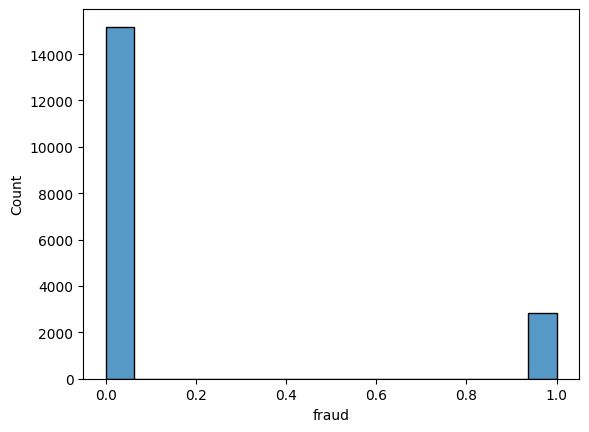

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('training_set_fd.csv', sep=';')
print(df.shape[0])
print(df.isna().sum())
sns.histplot(df, x='fraud')
plt.show()

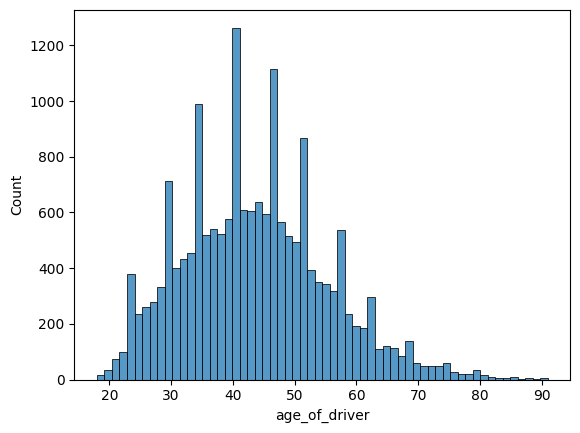

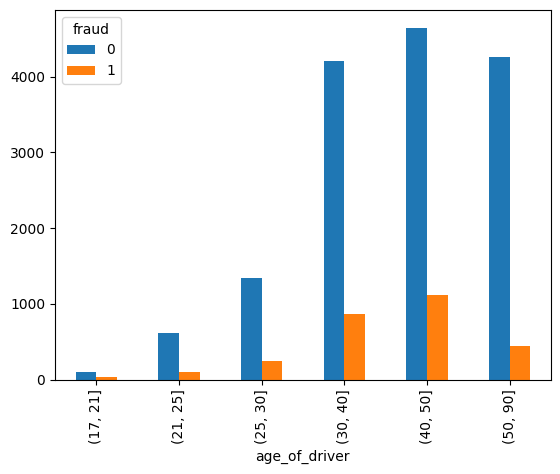

(40, 50]    0.398790
(30, 40]    0.307008
(50, 90]    0.159730
(25, 30]    0.088225
(21, 25]    0.036286
(17, 21]    0.009961
Name: age_of_driver, dtype: float64


In [17]:
df_young = df[df['age_of_driver'] <= 91]
sns.histplot(df_young, x='age_of_driver')
plt.show()
bins = [17,21,25,30,40,50,90]
df_young['age_of_driver'] = pd.cut(x=df_young['age_of_driver'], bins=bins)
df_young_bin = df_young.groupby(['age_of_driver', 'fraud'])
df_young_bin.size().unstack().plot.bar()
plt.show()
df_young_bin = df_young[df_young['fraud'] == 1]
print(df_young_bin['age_of_driver'].value_counts(normalize=True))

In [ ]:
df_age = df.copy()


Predizione decision tree Test: 1.0 Train: 1.0
Predizione logistic regression Test: 0.0 Train: 0.0


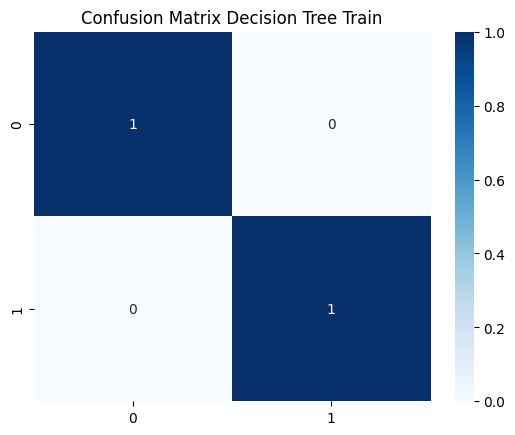

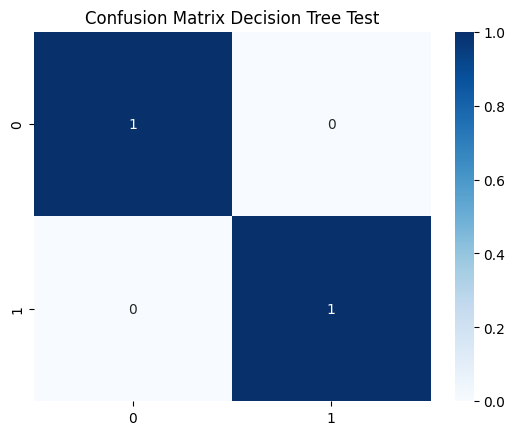

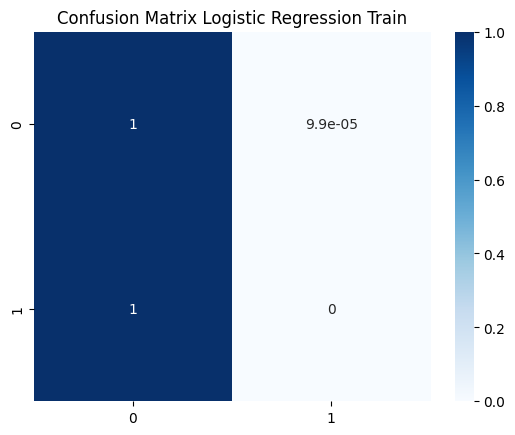

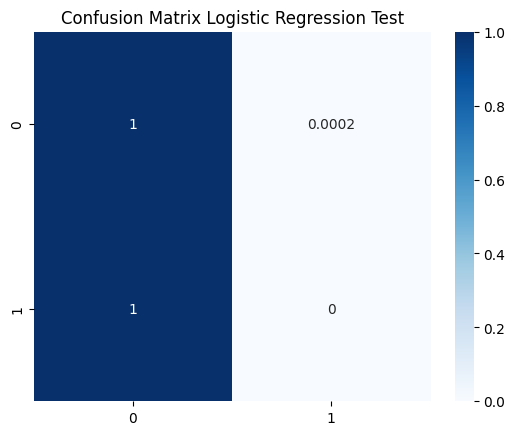

Predizione dummy Test: 0.0 Train: 0.0


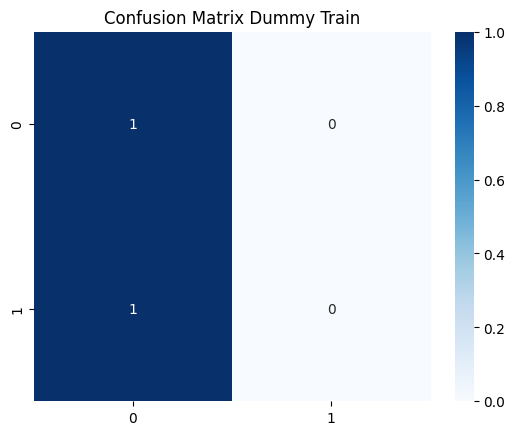

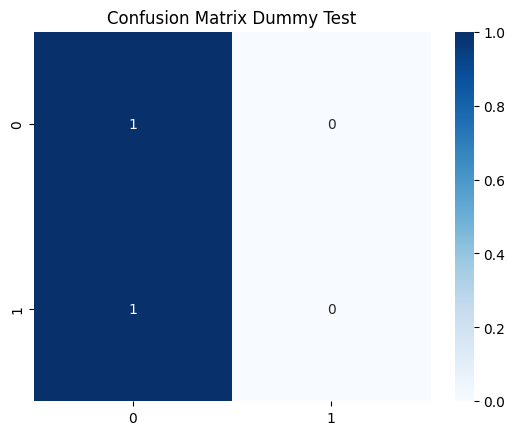

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('training_set_fd.csv', sep=';')
df.drop('claim_number', axis=1, inplace=True)
df.dropna(inplace=True)

cate_col = df.select_dtypes(include=['object'])

Xo = pd.get_dummies(cate_col)

X = Xo.join([df.drop(cate_col.columns, axis=1)])
y= df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3, random_state=0)

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {recall_score(y_test, test_pred)} Train: {recall_score(y_train, train_pred)}')

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train, y_train)

test_pred1 = logreg.predict(X_test)
train_pred1 = logreg.predict(X_train)
print(f'Predizione logistic regression Test: {recall_score(y_test, test_pred1)} Train: {recall_score(y_train, train_pred1)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred, normalize='true', labels=tree.classes_), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred, normalize='true', labels=tree.classes_), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Test')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred1, normalize='true', labels=logreg.classes_), annot=True, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1, normalize='true', labels=logreg.classes_), annot=True, cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Test')
plt.show()

dummy = DummyClassifier()
dummy.fit(X_train, y_train)

test_pred2 = dummy.predict(X_test)
train_pred2 = dummy.predict(X_train)
print(f'Predizione dummy Test: {recall_score(y_test, test_pred2)} Train: {recall_score(y_train, train_pred2)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred2, normalize='true'), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred2, normalize='true'), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Test')
plt.show()